##### Import Libraries

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##### Loading Data and Data Description

In [26]:
df= pd.read_csv('C:\\Users\\pc\\Downloads\\archive (16)\\winequality-red.csv')

In [28]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [32]:
df.shape

(1599, 12)

In [34]:
summary_stats =df.describe()
print(summary_stats)

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

##### Exploratory Data Analysis

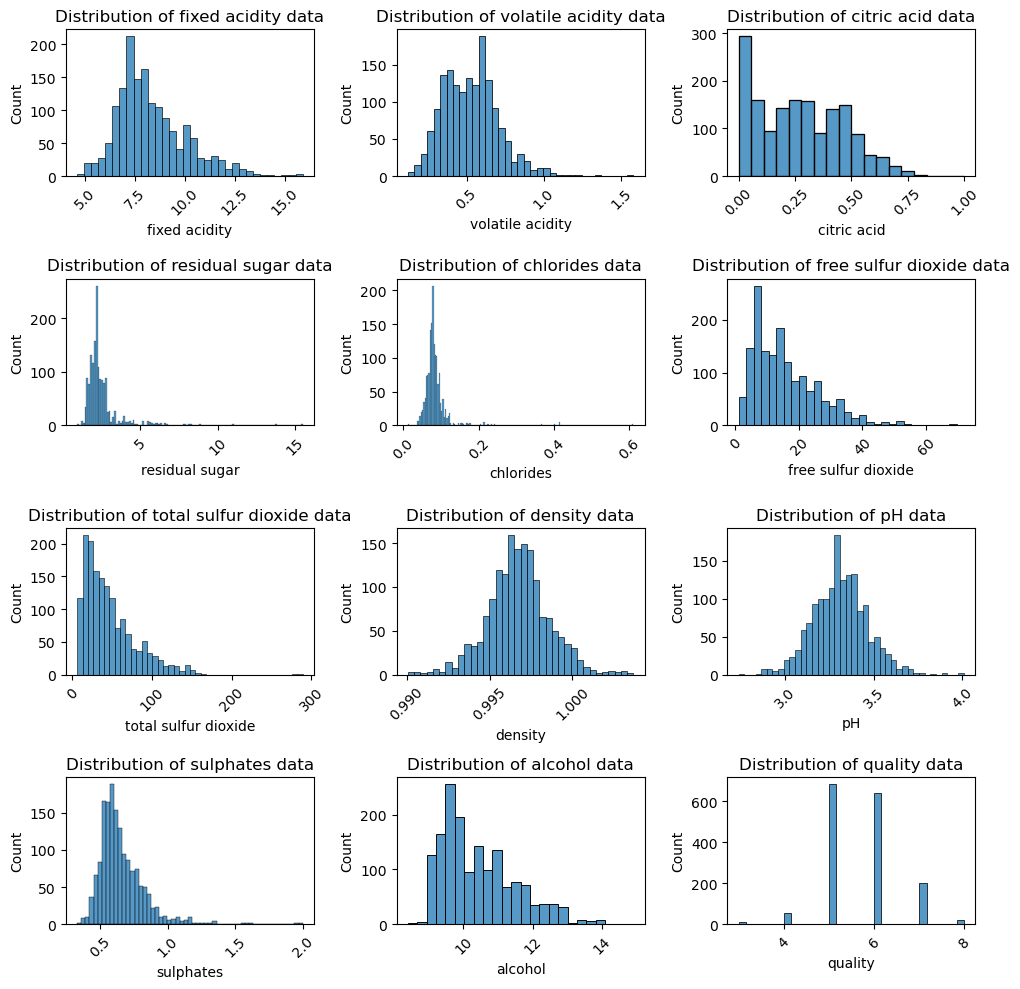

In [37]:
plt.figure(figsize = (10, 10))
for i, col in enumerate(df.columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(x = df[col])
    plt.title(f"Distribution of {col} data")
    plt.tight_layout()
    plt.xticks(rotation = 45)
    plt.plot()

In [38]:
correlation_matrix = df.corr()

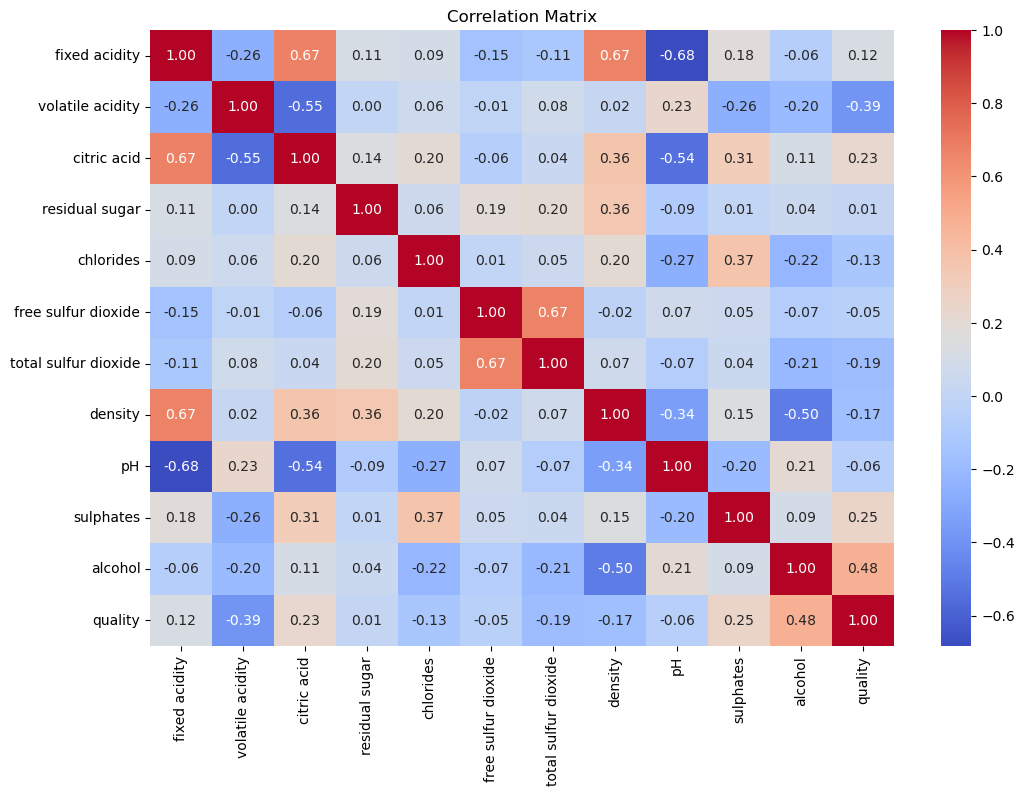

In [39]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

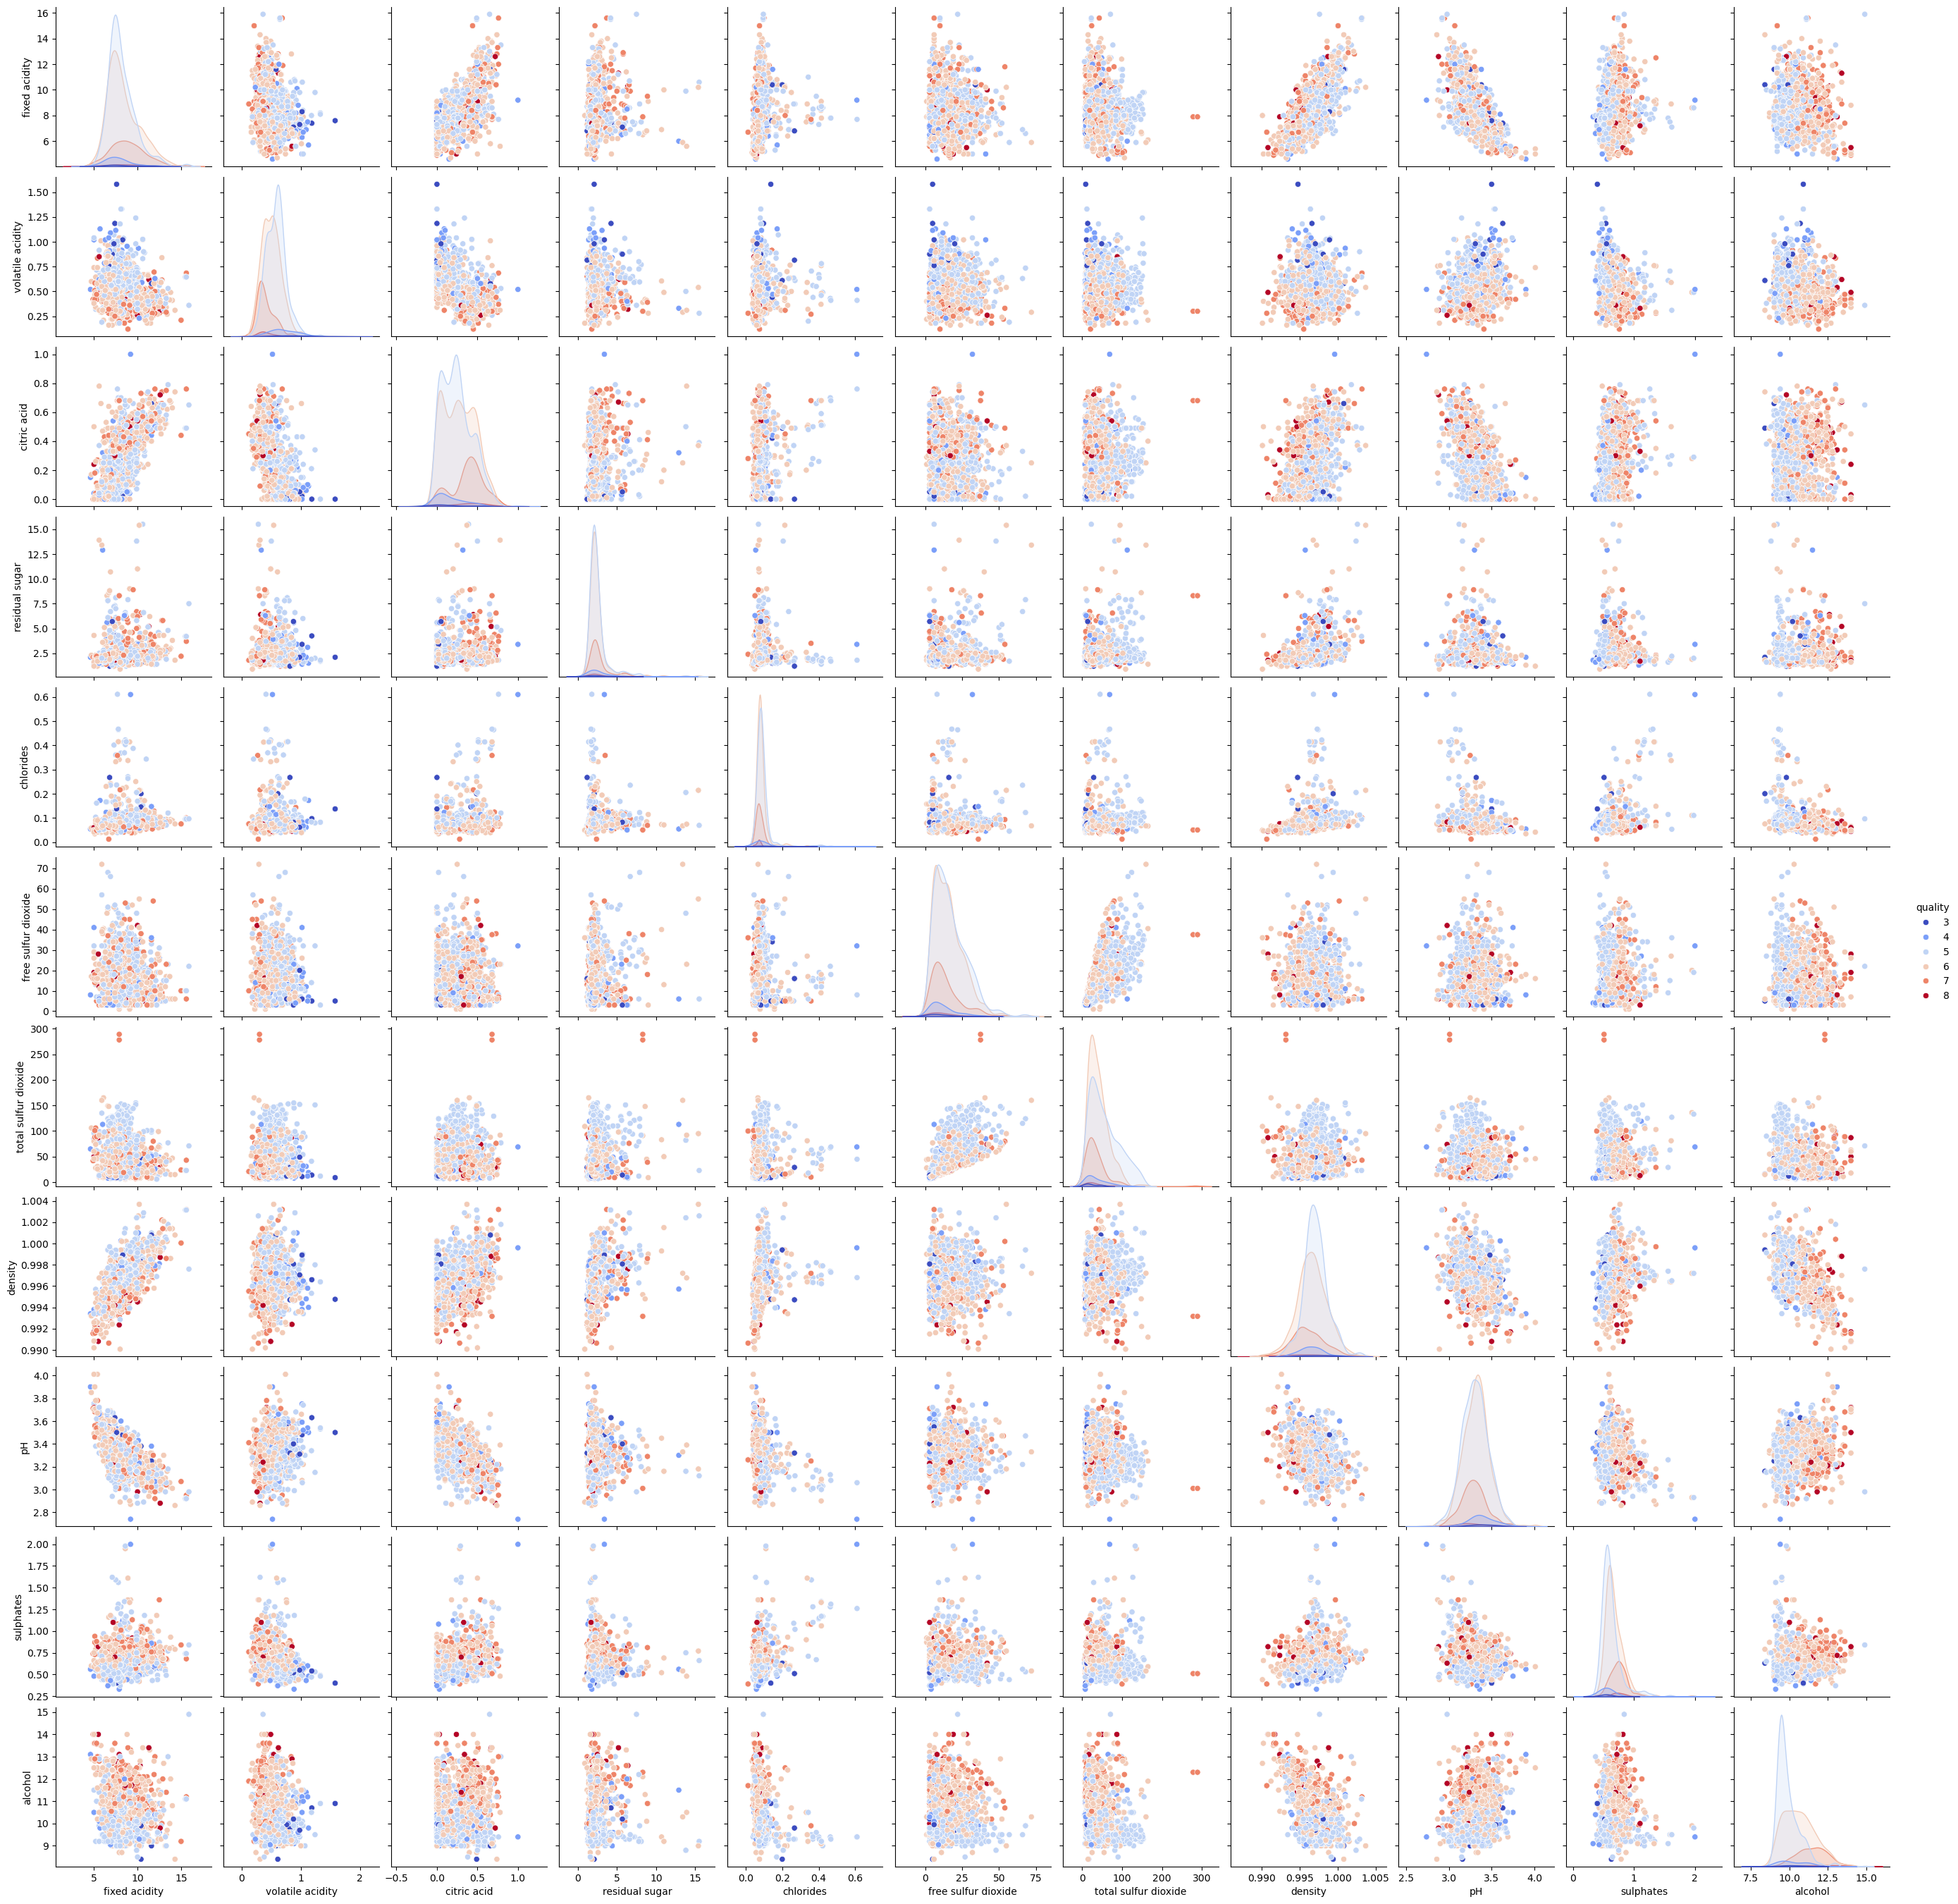

In [43]:
sns.pairplot(df, diag_kind='kde', hue='quality', palette='coolwarm')
plt.show()

##### DATA Preprocessing

In [47]:
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)


Missing values:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [49]:
df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

Text(0, 0.5, 'Count')

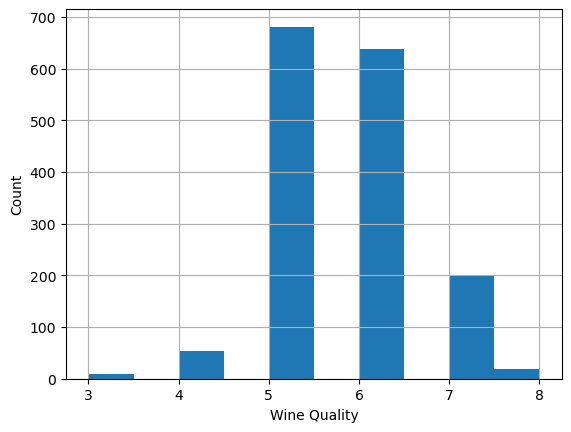

In [51]:
df.quality.hist()
plt.xlabel('Wine Quality')
plt.ylabel('Count')

In [53]:
df['quality'] = df['quality'].apply(lambda x: 1 if x > 6.5 else 0)

##### Random Forest Classification

In [56]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler


In [58]:
# Split the data into features and target variable
X = df.drop('quality', axis=1)
y = df['quality']


In [60]:
# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [62]:
## Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [64]:
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

In [66]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [68]:
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.9
Confusion Matrix:
[[264   9]
 [ 23  24]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       273
           1       0.73      0.51      0.60        47

    accuracy                           0.90       320
   macro avg       0.82      0.74      0.77       320
weighted avg       0.89      0.90      0.89       320



In [70]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}


In [72]:
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=1, verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


C:\Users\pc\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
540 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\pc\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\pc\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\pc\anaconda3\Lib\site-packages\sklearn\uti

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [73]:
best_rf_classifier = RandomForestClassifier(**best_params, random_state=42)
best_rf_classifier.fit(X_train, y_train)
best_y_pred = best_rf_classifier.predict(X_test)

In [74]:
best_accuracy = accuracy_score(y_test, best_y_pred)
best_conf_matrix = confusion_matrix(y_test, best_y_pred)
best_class_report = classification_report(y_test, best_y_pred)

In [75]:
print(f'Tuned Model Accuracy: {best_accuracy}')
print('Tuned Confusion Matrix:')
print(best_conf_matrix)
print('Tuned Classification Report:')
print(best_class_report)


Tuned Model Accuracy: 0.896875
Tuned Confusion Matrix:
[[264   9]
 [ 24  23]]
Tuned Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       273
           1       0.72      0.49      0.58        47

    accuracy                           0.90       320
   macro avg       0.82      0.73      0.76       320
weighted avg       0.89      0.90      0.89       320



In [80]:
feature_importances = best_rf_classifier.feature_importances_
feature_names = df.columns[:-1]

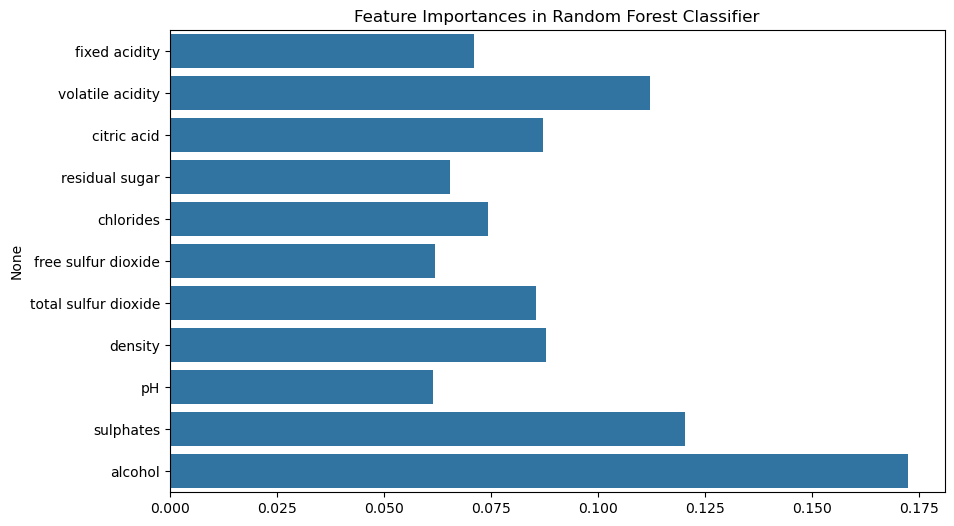

In [82]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_names)
plt.title('Feature Importances in Random Forest Classifier')
plt.show()

##### Support Vector Machine 

In [85]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance

In [87]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [89]:
# Initialize the SVM classifier
svm_classifier = SVC(random_state=42)

# Train the model
svm_classifier.fit(X_train, y_train)

# Make predictions
y_pred = svm_classifier.predict(X_test)


In [91]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [93]:
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.875
Confusion Matrix:
[[268   5]
 [ 35  12]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.38        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320



In [95]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

In [97]:
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=5, n_jobs=1, verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}


In [98]:
best_svm_classifier = SVC(**best_params, random_state=42)
best_svm_classifier.fit(X_train, y_train)
best_y_pred = best_svm_classifier.predict(X_test)

In [99]:
best_accuracy = accuracy_score(y_test, best_y_pred)
best_conf_matrix = confusion_matrix(y_test, best_y_pred)
best_class_report = classification_report(y_test, best_y_pred)

In [100]:
print(f'Tuned Model Accuracy: {best_accuracy}')
print('Tuned Confusion Matrix:')
print(best_conf_matrix)
print('Tuned Classification Report:')
print(best_class_report)

Tuned Model Accuracy: 0.890625
Tuned Confusion Matrix:
[[271   2]
 [ 33  14]]
Tuned Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       273
           1       0.88      0.30      0.44        47

    accuracy                           0.89       320
   macro avg       0.88      0.65      0.69       320
weighted avg       0.89      0.89      0.87       320



In [105]:
# Perform permutation feature importance on the tuned model
best_result = permutation_importance(best_svm_classifier, X_test, y_test, n_repeats=10, random_state=42, n_jobs=1)
best_feature_importances = best_result.importances_mean

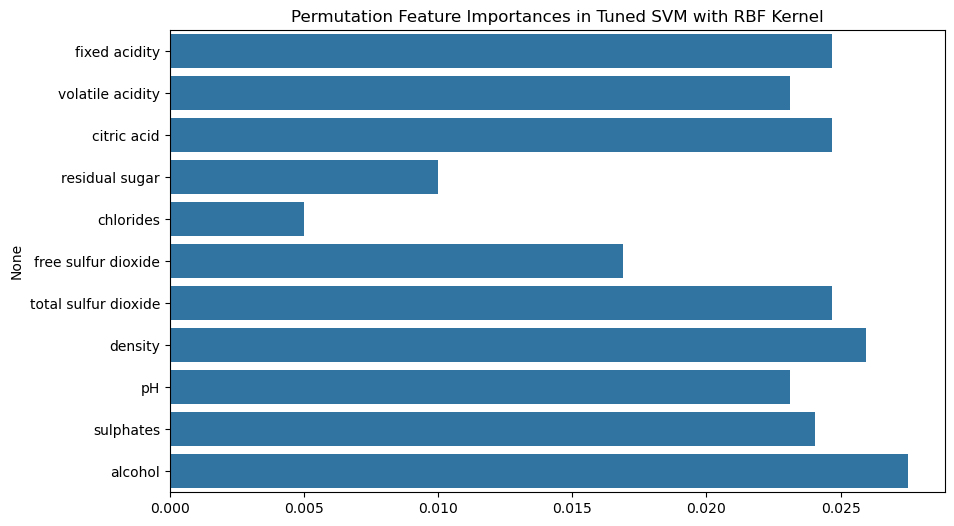

In [106]:
# Plot feature importances for the tuned model
plt.figure(figsize=(10, 6))
sns.barplot(x=best_feature_importances, y=feature_names)
plt.title('Permutation Feature Importances in Tuned SVM with RBF Kernel')
plt.show()

##### Gradient Boost Classification

In [108]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

In [112]:
# Split the data into features and target variable
X = df.drop('quality', axis=1)
y = df['quality']

In [114]:
# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [116]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [118]:
# Initialize the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Train the model
gb_classifier.fit(X_train, y_train)

# Make predictions
y_pred = gb_classifier.predict(X_test)

In [120]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


In [122]:
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


Accuracy: 0.878125
Confusion Matrix:
[[261  12]
 [ 27  20]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       273
           1       0.62      0.43      0.51        47

    accuracy                           0.88       320
   macro avg       0.77      0.69      0.72       320
weighted avg       0.86      0.88      0.87       320



In [124]:
# Perform hyperparameter tuning using Grid Search
param_distributions = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [126]:

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=gb_classifier, param_distributions=param_distributions, n_iter=20, cv=3, n_jobs=-1, verbose=1, random_state=42)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_
print(f'Best Parameters: {best_params}')

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 7, 'learning_rate': 0.1}


In [127]:
best_gb_classifier = GradientBoostingClassifier(**best_params, random_state=42)
best_gb_classifier.fit(X_train, y_train)
best_y_pred = best_gb_classifier.predict(X_test)


In [128]:
best_accuracy = accuracy_score(y_test, best_y_pred)
best_conf_matrix = confusion_matrix(y_test, best_y_pred)
best_class_report = classification_report(y_test, best_y_pred)

In [129]:
print(f'Tuned Model Accuracy: {best_accuracy}')
print('Tuned Confusion Matrix:')
print(best_conf_matrix)
print('Tuned Classification Report:')
print(best_class_report)


Tuned Model Accuracy: 0.89375
Tuned Confusion Matrix:
[[261  12]
 [ 22  25]]
Tuned Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       273
           1       0.68      0.53      0.60        47

    accuracy                           0.89       320
   macro avg       0.80      0.74      0.77       320
weighted avg       0.89      0.89      0.89       320



In [134]:
best_feature_importances = best_gb_classifier.feature_importances_
feature_names = df.columns[:-1]

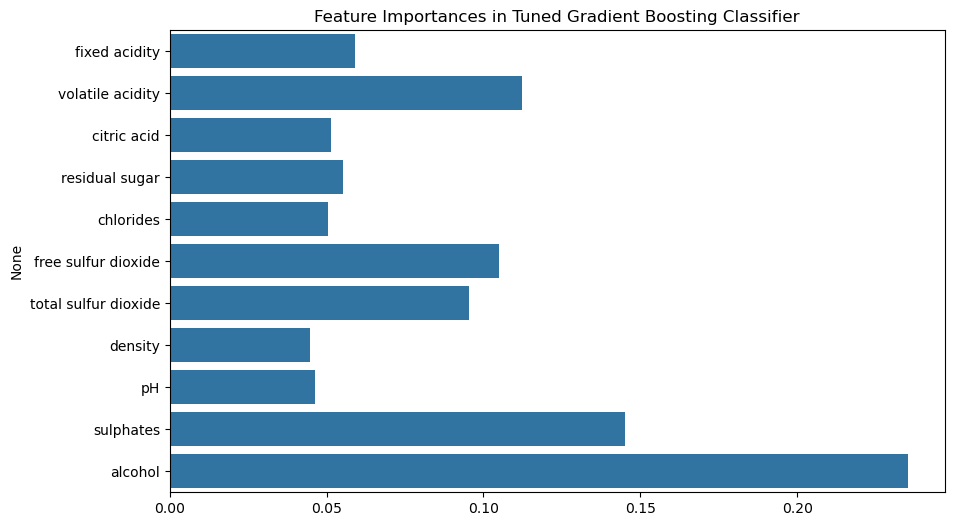

In [136]:
plt.figure(figsize=(10, 6))
sns.barplot(x=best_feature_importances, y=feature_names)
plt.title('Feature Importances in Tuned Gradient Boosting Classifier')
plt.show()

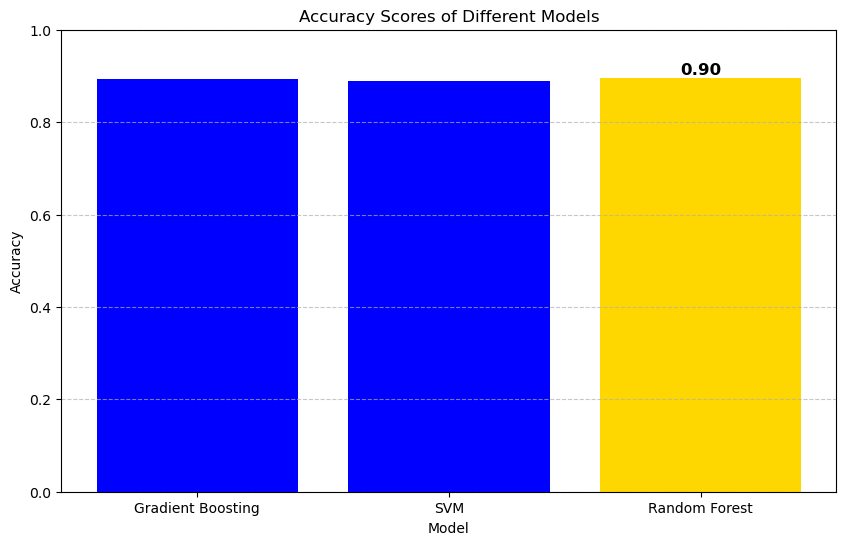

In [140]:
accuracy_scores = {
    'Gradient Boosting': 0.893, 
    'SVM': 0.890, 
    'Random Forest': 0.896  
}

# Identify the best model
best_model = max(accuracy_scores, key=accuracy_scores.get)
best_accuracy = accuracy_scores[best_model]

# Plot accuracy scores
plt.figure(figsize=(10, 6))

# Define colors for highlighting the best model
colors = ['blue' if model != best_model else 'gold' for model in accuracy_scores.keys()]

plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color=colors)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores of Different Models')
plt.ylim(0, 1)  # Assuming accuracy is between 0 and 1
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Highlight the best model
plt.text(best_model, best_accuracy, f'{best_accuracy:.2f}', 
         ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

plt.show()